# Particpant

### Title = "Engr"

### Name = "Sardar Abdullah Khawar"

### Email = "sardarabdullahkhawar16@gmail.com"

### Whatsapp = "00923429997862"
-----

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [36]:
# input variable
digits.data.shape
# means 1797 picture sizes 64=8*8

(1797, 64)

In [7]:
# output labels
digits.target.shape

(1797,)

In [38]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [39]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

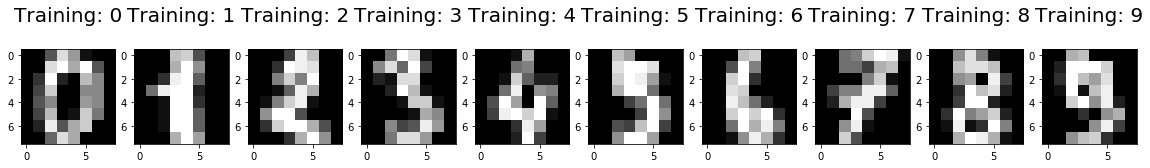

In [37]:
# plotting
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label,fontsize=20)

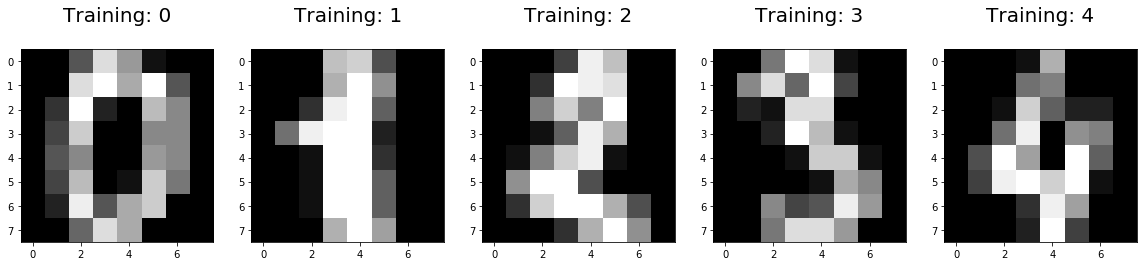

In [12]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label,fontsize=20)

In [13]:
# help(plt)

In [14]:
X = digits.data
y = digits.target

In [15]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 0)

In [19]:
print("Train input data:", X_train.shape)
print("Test input data:", X_test.shape)
print("Train output data:", y_train.shape)
print("Test output data:", y_test.shape)

Train input data: (1437, 64)
Test input data: (360, 64)
Train output data: (1437,)
Test output data: (360,)


In [22]:
# model train
from sklearn.linear_model import  LogisticRegression

model = LogisticRegression().fit(X_train,y_train)
model

C:\python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [23]:
model.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [24]:
# accuracy
score = model.score(X_test,y_test)
print("The accuracy score is : ",score)

The accuracy score is :  0.9666666666666667


In [30]:
# confusion matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,model.predict(X_test))
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
index =0
missclassifiedIndexes=[]
for label,predict in zip(y_test,model.predict(X_test)):
    if label!=predict:
        missclassifiedIndexes.append(index)
    index+=1

In [32]:
predictions = model.predict(X_test)

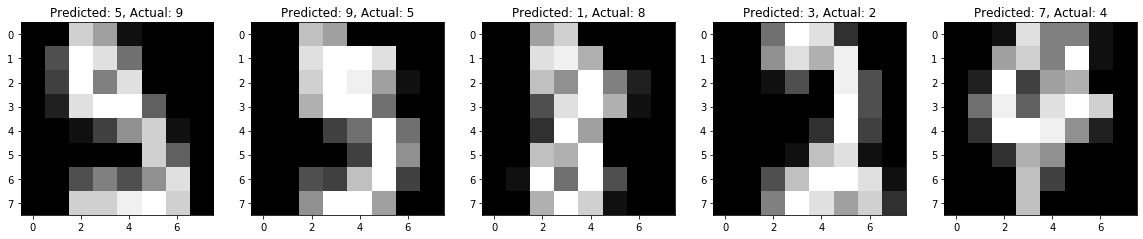

In [35]:
# predicted wrong
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(missclassifiedIndexes[5:10]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex],y_test[badIndex]))